In [1]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
from utils import graph, draw_path, draw
import math
from queue import PriorityQueue

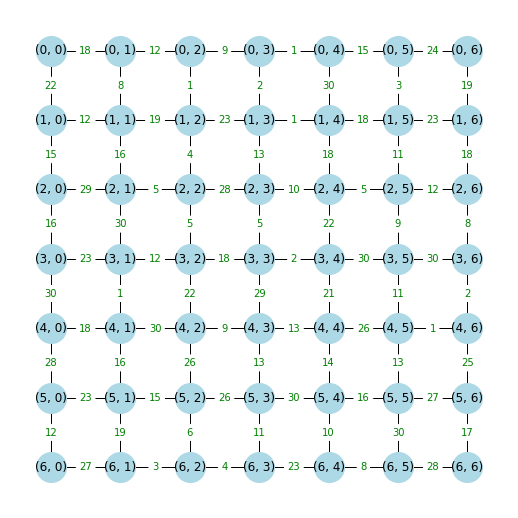

In [2]:
np.random.seed(827365)
G, pos = graph(7)

draw(G, pos)

In [3]:
start = (1,2)
end = (5,5)

In [4]:
def dijkstra(graph: nx.classes.graph.Graph, start, end):

    def backtrace(prev, start, end):
        node = end
        path = []
        while node != start:
            path.append(node)
            node = prev[node]
        path.append(node) 
        path.reverse()
        return path
    
    def cost(u, v):
        return graph.get_edge_data(u,v).get('weight')

    prev = {}
    dist = {v: math.inf for v in G.nodes}
    visited = set()
    pq = PriorityQueue()

    dist[start] = 0
    pq.put((dist[start], start))

    while not pq.empty():
        curr_cost, curr_n = pq.get()
        if curr_n == end:
            break
        visited.add(curr_n)
        for neighbor in graph.neighbors(curr_n):
            # if we found a shorter path 
            path = dist[curr_n] + cost(curr_n, neighbor)
            if path < dist[neighbor]:
                # update distance, we found a shorter one.
                dist[neighbor] = path
                prev[neighbor] = curr_n
                pq.put((dist[neighbor], neighbor))

    return backtrace(prev, start, end), dist[end], visited   

In [5]:
path, cost, visited = dijkstra(G, start, end)

In [6]:
print("Dijkstra's Path: ",path)
print("Dijkstra's Cost: ",cost)

Dijkstra's Path:  [(1, 2), (0, 2), (0, 3), (1, 3), (1, 4), (2, 4), (2, 5), (3, 5), (4, 5), (5, 5)]
Dijkstra's Cost:  69


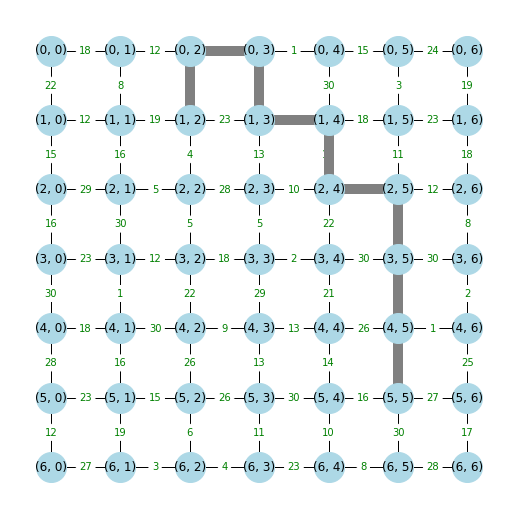

In [7]:
draw_path(G, start, end, path, pos)

In [8]:
len(visited)

43

In [9]:
def a_star_search(graph: nx.classes.graph.Graph, start, end, heuristic=None):
    if heuristic is None:
        def heuristic(a,b):
            return 0

    def backtrace(prev, start, end):
        node = end
        path = []
        while node != start:
            path.append(node)
            node = prev[node]
        path.append(node) 
        path.reverse()
        return path
    
    def cost(u, v):
        return graph.get_edge_data(u,v).get('weight')

    pq = PriorityQueue()
    prev = {}
    visited = set()
    g_score = {v: math.inf for v in G.nodes}
    f_score = {v: math.inf for v in G.nodes}

    g_score[start] = 0
    f_score[start] = heuristic(start, end)

    pq.put((f_score[start], start))

    while not pq.empty():
        curr_cost, curr_node = pq.get()
        if curr_node == end:
            return backtrace(prev, start, end), g_score[end], visited
        visited.add(curr_node)
        for neighbor in G.neighbors(curr_node):
            # if we found a shorter path 
            fn = g_score[curr_node] + cost(curr_node, neighbor)
            if fn < g_score[neighbor]:
                # update distance, we found a shorter one.
                g_score[neighbor] = fn
                f_score[neighbor] = fn + heuristic(neighbor, end)
                prev[neighbor] = curr_node
                pq.put((f_score[neighbor], neighbor))


In [10]:
def manhattan(a, b):
    diff = tuple(x-y for x,y in zip(a,b))
    return np.sum(np.abs(diff))

In [18]:
# change weight of graph to 1 for better understanding
for (u, v) in G.edges():
    G.edges[u,v]['weight'] = 1

path_a, cost_a, visited_a = a_star_search(G, start, end, heuristic=manhattan)

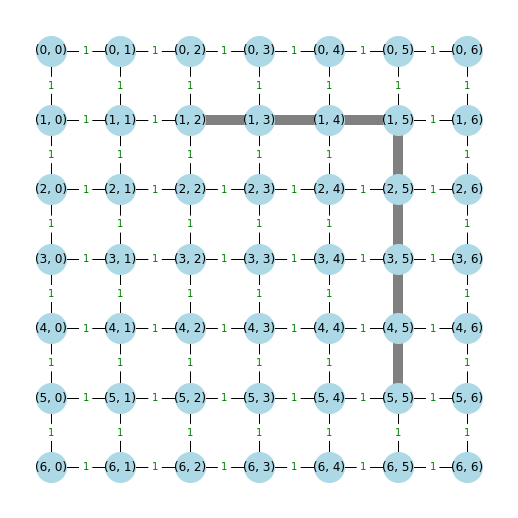

In [20]:
draw_path(G, start, end, path_a, pos)

In [21]:
len(visited_a)

19